# 2.1 Preparing and exploring the data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure plots display inline
%matplotlib inline

# -------------------------------------------------------
# 1. LOAD DATA FROM EXCEL
# -------------------------------------------------------
filename = 'merged_data.xlsx'

try:
    # sheet_name=None reads all sheets into a dictionary of DataFrames
    all_sheets = pd.read_excel(filename, sheet_name=None)
    
    dfs = []
    for sheet_name, df in all_sheets.items():
        # Clean up species name if needed (optional)
        # We assume the sheet name represents the species (e.g., "Human", "Mouse")
        df['Species'] = sheet_name 
        dfs.append(df)
        print(f"✅ Loaded sheet '{sheet_name}': {len(df)} records")
        
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Force numeric columns
        cols = ['Precursor length', 'Mature length', 'Star length']
        for col in cols:
            if col in combined_df.columns:
                combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
        
        print(f"\nTotal records merged: {len(combined_df)}")
        display(combined_df.head())
    else:
        print("❌ No sheets found in the Excel file.")

except FileNotFoundError:
    print(f"❌ File not found: {filename}")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Loaded sheet 'Human': 514 records
✅ Loaded sheet 'House mouse': 404 records
✅ Loaded sheet 'Fruit fly': 140 records
✅ Loaded sheet 'Roundworm': 138 records

Total records merged: 1196


,MirGeneDB ID,MiRBase ID,Family,Seed,Chromosome,Start,End,Strand,Precursor sequence,Mature sequence,Star sequence,Mature location,Precursor length,Mature length,Star length,Species
0,Hsa-Let-7-P1b,hsa-let-7e,LET-7,GAGGUAG,chr19,51692793,51692859,+,UGAGGUAGGAGGUUGUAUAGUUGAGGAGGACACCCAAGGAGAUCAC...,UGAGGUAGGAGGUUGUAUAGUU,CUAUACGGCCUCCUAGCUUUCC,5p,67,22,22,Human
1,Hsa-Let-7-P1c,hsa-let-7c,LET-7,GAGGUAG,chr21,16539838,16539904,+,UGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCUGGGAGUUAAC...,UGAGGUAGUAGGUUGUAUGGUU,CUGUACAACCUUCUAGCUUUCC,5p,67,22,22,Human
2,Hsa-Let-7-P1d,hsa-let-7a-2,LET-7,GAGGUAG,chr11,122146523,122146589,-,UGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGAUAAC...,UGAGGUAGUAGGUUGUAUAGUU,CUGUACAGCCUCCUAGCUUUCC,5p,67,22,22,Human
3,Hsa-Let-7-P2a1,hsa-let-7a-1,LET-7,GAGGUAG,chr9,94175962,94176033,+,UGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCACUGGGA...,UGAGGUAGUAGGUUGUAUAGUU,CUAUACAAUCUACUGUCUUUC,5p,72,22,21,Human
4,Hsa-Let-7-P2a2,hsa-let-7a-3,LET-7,GAGGUAG,chr22,46112752,46112820,+,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAU...,UGAGGUAGUAGGUUGUAUAGUU,CUAUACAAUCUACUGUCUUUC,5p,69,22,21,Human


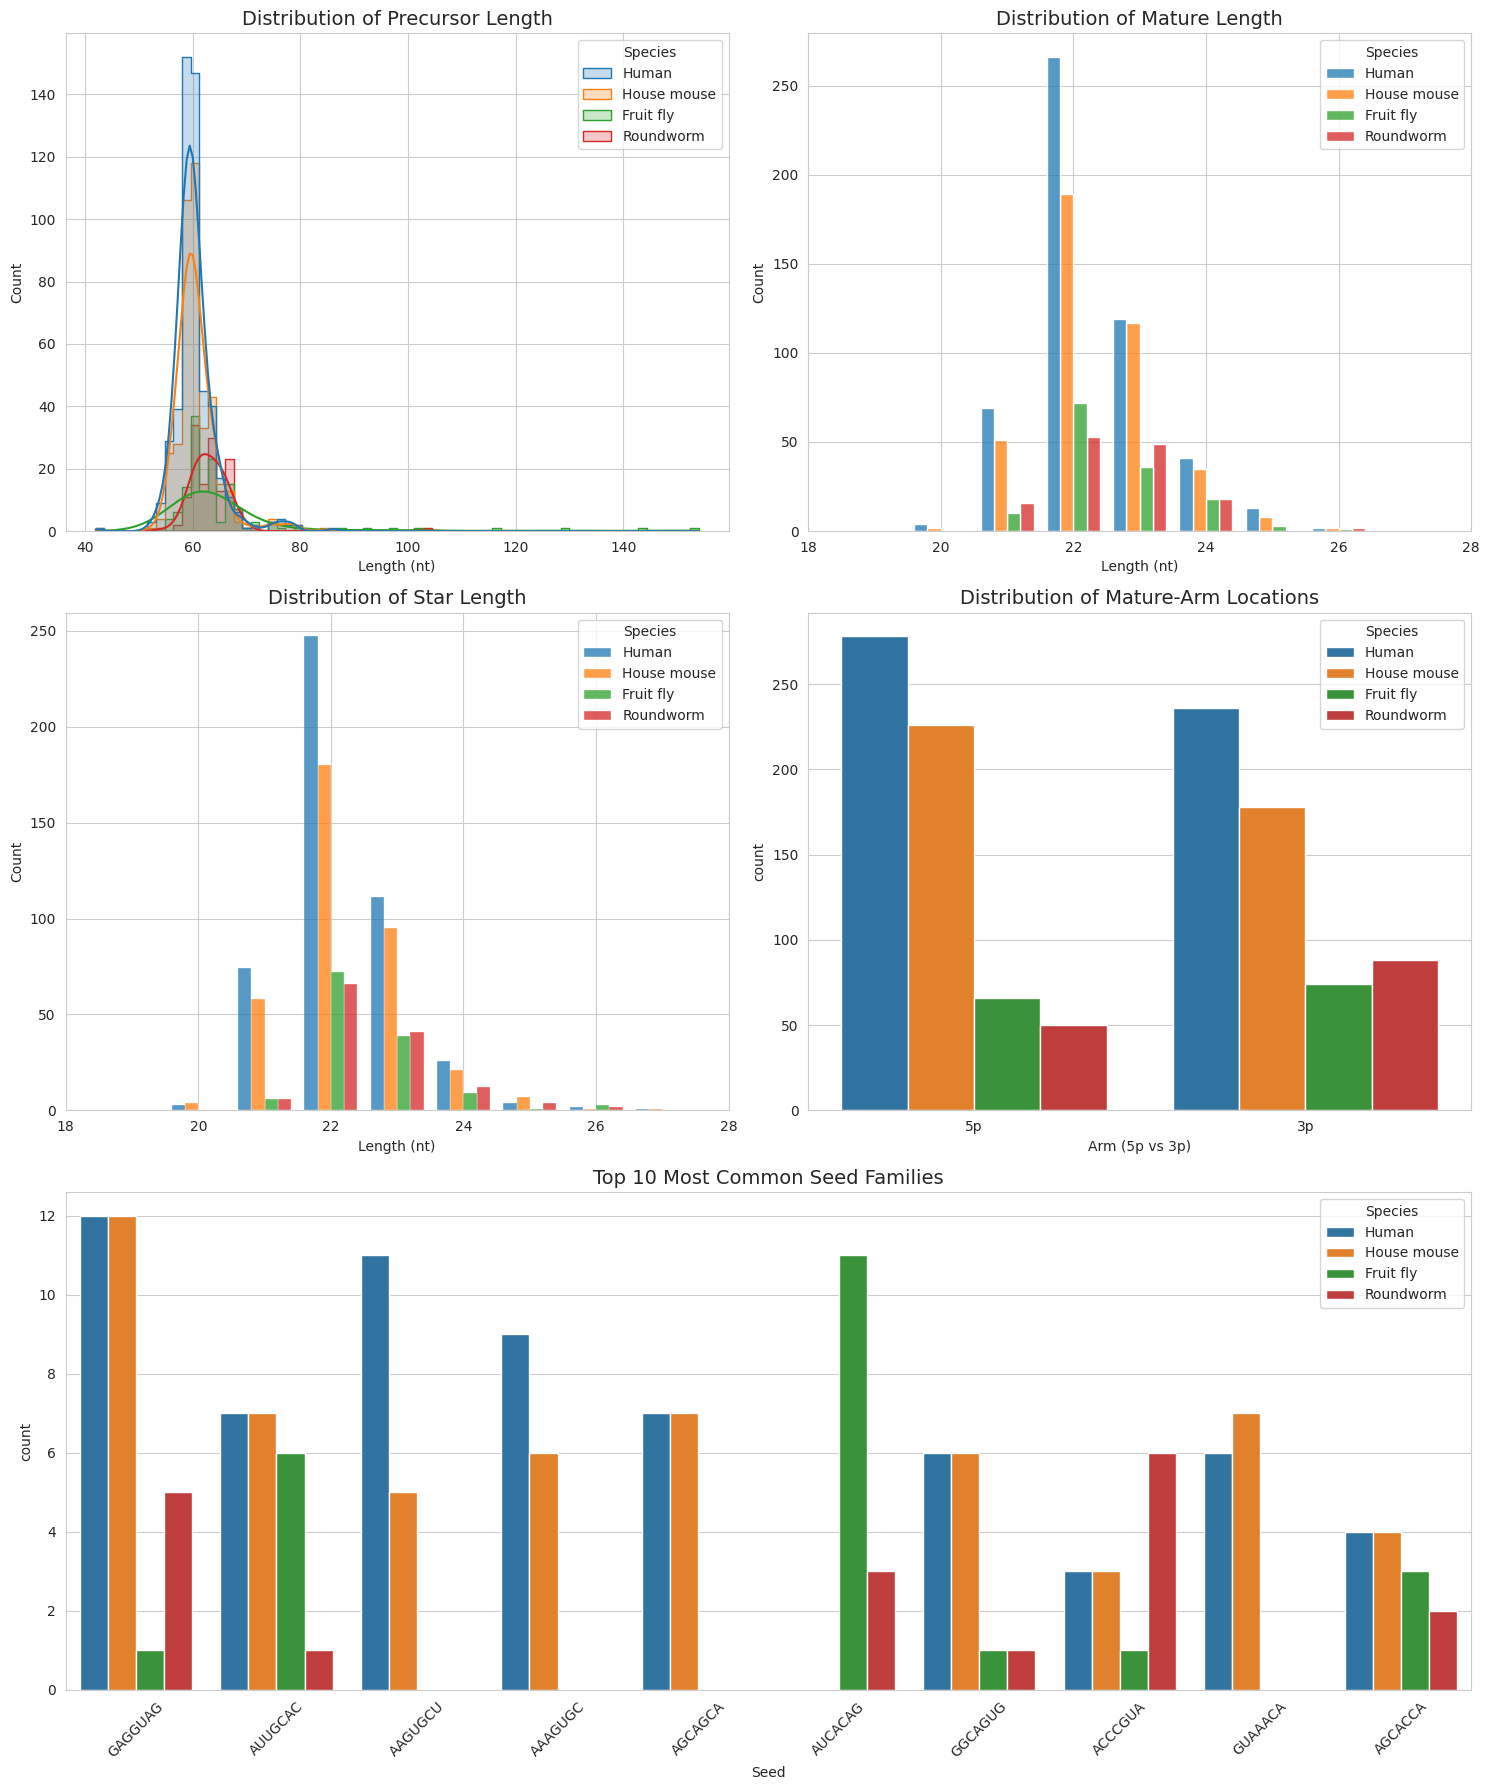

In [7]:
# -------------------------------------------------------
# 2. GENERATE PLOTS
# -------------------------------------------------------
if dfs:
    sns.set_style("whitegrid")
    
    # Create figure with grid layout (3 rows, 2 columns)
    fig = plt.figure(figsize=(15, 18))
    gs = fig.add_gridspec(3, 2)
    palette = "tab10"

    # --- Plot 1: Precursor Length ---
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=combined_df, x='Precursor length', hue='Species', 
                 kde=True, element="step", ax=ax1, palette=palette)
    ax1.set_title('Distribution of Precursor Length', fontsize=14)
    ax1.set_xlabel('Length (nt)')

    # --- Plot 2: Mature Length ---
    ax2 = fig.add_subplot(gs[0, 1])
    # Mature lengths are discrete (mostly 20-25), so we use discrete=True
    sns.histplot(data=combined_df, x='Mature length', hue='Species', 
                 multiple="dodge", shrink=0.8, discrete=True, ax=ax2, palette=palette)
    ax2.set_title('Distribution of Mature Length', fontsize=14)
    ax2.set_xlabel('Length (nt)')
    ax2.set_xlim(18, 28) # Focus on relevant region

    # --- Plot 3: Star Length ---
    ax3 = fig.add_subplot(gs[1, 0])
    sns.histplot(data=combined_df, x='Star length', hue='Species', 
                 multiple="dodge", shrink=0.8, discrete=True, ax=ax3, palette=palette)
    ax3.set_title('Distribution of Star Length', fontsize=14)
    ax3.set_xlabel('Length (nt)')
    ax3.set_xlim(18, 28)

    # --- Plot 4: Mature-Arm Location ---
    ax4 = fig.add_subplot(gs[1, 1])
    sns.countplot(data=combined_df, x='Mature location', hue='Species', 
                  ax=ax4, palette=palette)
    ax4.set_title('Distribution of Mature-Arm Locations', fontsize=14)
    ax4.set_xlabel('Arm (5p vs 3p)')

    # --- Plot 5: Top 10 Seed Families ---
    ax5 = fig.add_subplot(gs[2, :])
    # Get top 10 most common seeds across ALL species
    top_seeds = combined_df['Seed'].value_counts().nlargest(10).index
    seed_data = combined_df[combined_df['Seed'].isin(top_seeds)]
    
    sns.countplot(data=seed_data, x='Seed', hue='Species', 
                  order=top_seeds, ax=ax5, palette=palette)
    ax5.set_title('Top 10 Most Common Seed Families', fontsize=14)
    ax5.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show() # Display in notebook
else:
    print("Data not loaded, cannot plot.")

In [8]:
# -------------------------------------------------------
# 3. PRINT STATISTICS
# -------------------------------------------------------
if dfs:
    print("=== SUMMARY STATISTICS BY SPECIES ===")
    
    # Group by Species and get descriptive stats for lengths
    stats = combined_df.groupby('Species')[['Precursor length', 'Mature length', 'Star length']].describe()
    
    # Display Mean and Std for clarity
    display(stats.loc[:, (slice(None), ['mean', 'std'])])

    print("\n=== MATURE ARM LOCATION COUNTS ===")
    arm_counts = combined_df.groupby(['Species', 'Mature location']).size().unstack(fill_value=0)
    display(arm_counts)

=== SUMMARY STATISTICS BY SPECIES ===


Precursor length            Mature length           Star length  \
                        mean        std          mean       std        mean   
Species                                                                       
Fruit fly          65.921429  14.170121     22.535714  0.932319   20.900000   
House mouse        60.690594   4.145710     22.405941  0.936476   20.235149   
Human              60.367704   3.993539     22.332685  0.947049   20.241245   
Roundworm          63.282609   4.468853     22.557971  0.959152   21.456522   

                       
                  std  
Species                
Fruit fly    5.881687  
House mouse  6.496164  
Human        6.408463  
Roundworm    5.061836


=== MATURE ARM LOCATION COUNTS ===


Mature location,3p,5p
Species,,
Fruit fly,74,66
House mouse,178,226
Human,236,278
Roundworm,88,50


# 2.2 Predicting RNA secondary structure

In [21]:
import pandas as pd
import numpy as np

# Try to import the library we just installed
try:
    import RNA
    print(f"✅ ViennaRNA version {RNA.__version__} is ready.")
except ImportError:
    print("❌ ViennaRNA not found. (If you installed it, restart your kernel).")

✅ ViennaRNA version 2.7.1 is ready.


In [22]:
# ---------------------------------------------------------
# 1. SETUP
# ---------------------------------------------------------
input_file = 'merged_data.xlsx'
# We will save the result here
output_file = 'merged_data_features.xlsx' 

# ---------------------------------------------------------
# 2. THE MASTER FUNCTION (Folding + Feature Extraction)
# ---------------------------------------------------------
def analyze_rna(row):
    # 1. Clean Sequence
    if pd.isna(row['Precursor sequence']):
        return pd.Series({})
    
    seq = str(row['Precursor sequence']).strip().upper().replace('T', 'U')
    
    # -----------------------------------------------------
    # PART A: FOLDING (Section 2.2)
    # -----------------------------------------------------
    # RNA.fold() returns a tuple: (structure_string, mfe_float)
    structure, mfe = RNA.fold(seq)
    
    # -----------------------------------------------------
    # PART B: FEATURE EXTRACTION (Section 2.3)
    # -----------------------------------------------------
    
    # --- 1. Identify Regions ---
    # We need to know where the Mature and Star sequences sit inside the Precursor
    mat_seq = str(row['Mature sequence']).strip().upper().replace('T', 'U') if pd.notna(row['Mature sequence']) else ""
    star_seq = str(row['Star sequence']).strip().upper().replace('T', 'U') if pd.notna(row['Star sequence']) else ""
    
    # Find start/end positions (0-based index)
    mat_start = seq.find(mat_seq)
    mat_end = mat_start + len(mat_seq)
    
    star_start = seq.find(star_seq)
    star_end = star_start + len(star_seq)

    # --- 2. Parse the Structure ---
    # We need to convert "((..))" into actual pairs of indices
    pairs = []
    stack = []
    for i, char in enumerate(structure):
        if char == '(':
            stack.append(i)
        elif char == ')':
            if stack:
                start_index = stack.pop()
                pairs.append((start_index, i)) # Tuple (start, end)

    # --- 3. Calculate Required Features ---
    
    # Feature: Base Pair Counts (Global)
    gc = 0; au = 0; gu = 0
    for i, j in pairs:
        # Get the two bases
        base1 = seq[i]
        base2 = seq[j]
        pair_str = "".join(sorted([base1, base2])) # Sort to handle GU vs UG
        
        if pair_str == "CG": gc += 1
        elif pair_str == "AU": au += 1
        elif pair_str == "GU": gu += 1

    # Feature: Pairs inside Mature / Star regions
    mat_pairs = 0
    star_pairs = 0
    for i, j in pairs:
        # Check if BOTH bases of the pair are inside the mature region
        if (mat_start != -1) and (mat_start <= i < mat_end) and (mat_start <= j < mat_end):
            mat_pairs += 1
        # Check if BOTH bases are inside the star region
        if (star_start != -1) and (star_start <= i < star_end) and (star_start <= j < star_end):
            star_pairs += 1

    # Feature: Loop Size (Terminal Loop)
    # Heuristic: Find the pair (i,j) that encloses NO other pairs
    terminal_loops = []
    if pairs:
        for i, j in pairs:
            # Assume it is a terminal loop
            is_terminal = True
            for k, l in pairs:
                # If we find another pair (k,l) strictly inside (i,j), it's not terminal
                if k > i and l < j:
                    is_terminal = False
                    break
            if is_terminal:
                terminal_loops.append(j - i - 1)
        loop_size = max(terminal_loops) if terminal_loops else 0
    else:
        loop_size = 0

    # Feature: Unmatched Nucleotides (Optional Feature #1)
    pre_unmatched = structure.count('.')
    
    # Feature: Mature Unmatched (Optional Feature #2)
    if mat_start != -1:
        mat_struct = structure[mat_start:mat_end]
        mat_unmatched = mat_struct.count('.')
    else:
        mat_unmatched = 0

    return pd.Series({
        'structure': structure,
        'MFE': mfe,
        'GC_pairs': gc,
        'AU_pairs': au,
        'GU_pairs': gu,
        'Mature_pairs': mat_pairs,
        'Star_pairs': star_pairs,
        'Loop_size': loop_size,
        'Precursor_unmatched': pre_unmatched,
        'Mature_unmatched': mat_unmatched,
        # Add placeholder 0s if you need more custom features to reach 5
        'Feature_Placeholder_3': 0, 
        'Feature_Placeholder_4': 0,
        'Feature_Placeholder_5': 0
    })

# ---------------------------------------------------------
# 3. EXECUTION LOOP
# ---------------------------------------------------------
try:
    # Read all sheets
    all_sheets = pd.read_excel(input_file, sheet_name=None)
    processed_sheets = {}

    for species, df in all_sheets.items():
        print(f"🧬 Processing {species} ({len(df)} sequences)...")
        
        # Apply the master function
        # This creates a new DataFrame of features
        features_df = df.apply(analyze_rna, axis=1)
        
        # Combine original data with new features
        # We drop columns if they already exist to avoid duplicates
        df_clean = df.drop(columns=['structure', 'MFE'], errors='ignore')
        final_df = pd.concat([df_clean, features_df], axis=1)
        
        processed_sheets[species] = final_df

    # Save to Excel
    with pd.ExcelWriter(output_file) as writer:
        for species, df in processed_sheets.items():
            df.to_excel(writer, sheet_name=species, index=False)
            
    print(f"\n✅ Success! Saved to {output_file}")

except FileNotFoundError:
    print(f"❌ File not found: {input_file}")
except Exception as e:
    print(f"❌ Error: {e}")

🧬 Processing Human (514 sequences)...
🧬 Processing House mouse (404 sequences)...
🧬 Processing Fruit fly (140 sequences)...
🧬 Processing Roundworm (138 sequences)...

✅ Success! Saved to merged_data_features.xlsx


# 2.3 Extracting Structural Features

# 2.4 Machine learning: Classifying miRNA precursors across species

In [26]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# CONFIGURATION
# ---------------------------------------------------------
file_1 = 'merged_data_features.xlsx'          # File A (e.g., Batch method result)
file_2 = 'merged_data_folded.xlsx' # File B (e.g., ViennaRNA Library result)

print(f"🕵️‍♂️ COMPARING:\n  A: {file_1}\n  B: {file_2}\n")

try:
    # Load both files (all sheets)
    # dtype=str ensures we compare structures as text exactly (avoids float conversion issues)
    xls1 = pd.read_excel(file_1, sheet_name=None, dtype={'structure': str})
    xls2 = pd.read_excel(file_2, sheet_name=None, dtype={'structure': str})
    
    # 1. COMPARE SHEET NAMES
    sheets1 = set(xls1.keys())
    sheets2 = set(xls2.keys())
    
    if sheets1 != sheets2:
        print(f"❌ SHEET MISMATCH!")
        print(f"   In A only: {sheets1 - sheets2}")
        print(f"   In B only: {sheets2 - sheets1}")
    else:
        print(f"✅ Sheet names match exactly: {sorted(list(sheets1))}")
        
        # 2. COMPARE EACH SHEET
        all_passed = True
        
        for sheet in sorted(list(sheets1)):
            print(f"\n📋 Checking sheet: '{sheet}'...")
            df1 = xls1[sheet]
            df2 = xls2[sheet]
            
            # Check A: Row Counts
            if len(df1) != len(df2):
                print(f"   ❌ ROW COUNT MISMATCH: File A has {len(df1)}, File B has {len(df2)}")
                all_passed = False
                continue
            else:
                print(f"   ✅ Row counts match ({len(df1)} rows).")
            
            # Check B: Column Existence
            if 'structure' not in df1.columns:
                print(f"   ⚠️ 'structure' column missing in {file_1}")
                continue
            if 'structure' not in df2.columns:
                print(f"   ⚠️ 'structure' column missing in {file_2}")
                continue
                
            # Check C: Content Comparison
            # Fill NaN with empty string to ensure fair comparison
            struct1 = df1['structure'].fillna("").str.strip()
            struct2 = df2['structure'].fillna("").str.strip()
            
            if struct1.equals(struct2):
                print(f"   ✅ 'structure' column content is IDENTICAL.")
            else:
                print(f"   ❌ CONTENT MISMATCH in 'structure' column!")
                # detailed error
                diffs = (struct1 != struct2)
                mismatched_indices = diffs[diffs].index.tolist()
                print(f"      Found {len(mismatched_indices)} differences.")
                print(f"      First mismatch at row {mismatched_indices[0]}:")
                print(f"      File A: {struct1.iloc[mismatched_indices[0]]}")
                print(f"      File B: {struct2.iloc[mismatched_indices[0]]}")
                all_passed = False

        if all_passed:
            print("\n🎉 SUCCESS: The files are structurally identical!")
        else:
            print("\n⚠️ WARNING: Differences were found (see above).")

except FileNotFoundError as e:
    print(f"❌ Error: Could not find file. {e}")
except Exception as e:
    print(f"❌ An error occurred: {e}")

🕵️‍♂️ COMPARING:
  A: merged_data_features.xlsx
  B: merged_data_folded.xlsx

✅ Sheet names match exactly: ['Fruit fly', 'House mouse', 'Human', 'Roundworm']

📋 Checking sheet: 'Fruit fly'...
   ✅ Row counts match (140 rows).
   ✅ 'structure' column content is IDENTICAL.

📋 Checking sheet: 'House mouse'...
   ✅ Row counts match (404 rows).
   ✅ 'structure' column content is IDENTICAL.

📋 Checking sheet: 'Human'...
   ✅ Row counts match (514 rows).
   ✅ 'structure' column content is IDENTICAL.

📋 Checking sheet: 'Roundworm'...
   ✅ Row counts match (138 rows).
   ✅ 'structure' column content is IDENTICAL.

🎉 SUCCESS: The files are structurally identical!
